# **Heatmap Generation**

In this ipython notebook, heatmaps are generated based on a summary of chemokine expressions from the CCLE database in order to identify the relative expression of CKLF and other chemokine markers associated with cancer.

Data was obtained using as input Summary_Results.xlsx produced from CCLE_expression.ipynb

# Heatmap

Generate a heatmap for all desired chemokine markers over the 95 various cancer types.

In [1]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

#import statements
import pandas as pd, statistics, matplotlib.pyplot as plt, math, numpy as np
from scipy import stats
import glob
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#install bioinfokit package
#!pip install bioinfokit

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import input files
path2 = '/content/drive/MyDrive/Colab Notebooks/Feng lab/CCLE Database Gene Expression/Output/'
summary_df = pd.read_excel(path2 + 'Cancer Summary_old/Summary_Results.xlsx', header=0)
summary_df = summary_df.set_index('Cancer Type')

#helper function to plot heatmaps
def plot_heatmap(df, title, filename):
  fig, ax = plt.subplots(figsize=(16, 14))
  ax = sns.heatmap(df.T, cmap= 'seismic', yticklabels=True, xticklabels=True)
  plt.tick_params(labelsize=16,
                  top=False,
                bottom=False,
                left=False,
                right=False,
                labelleft=True,
                labelbottom=False,
                labeltop=True)
  ax.set_title(title, fontdict={'fontsize': 16})
  plt.xticks(rotation=90)
  ax.set(xlabel=None)
  plt.tight_layout()
  plt.autoscale()
  fig.savefig(path2 + 'Heatmap/' + filename)
  return

#helper function to plot heatmaps without any labels
def plot_heatmap_no_labels(df, title, filename):
  fig, ax = plt.subplots(figsize=(16, 14))
  ax = sns.heatmap(df.T, cmap= 'seismic', yticklabels=False, xticklabels=False)
  plt.tick_params(labelsize=16,
                  top=False,
                bottom=False,
                left=False,
                right=False,
                labelleft=False,
                labelbottom=False,
                labeltop=False)
  plt.xticks(rotation=90)
  ax.set(xlabel=None)
  plt.tight_layout()
  plt.autoscale()
  fig.savefig(path2 + 'Heatmap/' + filename)
  return

#function to plot heatmap with final specifications
def plot_final_heatmap(df, filename, colormap):
  title = ' '
  fig, ax = plt.subplots(figsize=(24, 16), gridspec_kw=dict(top=1, bottom=0))
  ax = sns.heatmap(df.T, cmap= colormap, vmin=0, vmax= 12.5, yticklabels=True, xticklabels=True, square=True, cbar=True,
                  cbar_kws={"orientation":"vertical", "shrink":0.5, "pad": 0.015})
  plt.tick_params(labelsize=12,
                  top=False,
                bottom=False,
                left=False,
                right=False,
                labelleft=True,
                labelbottom=False,
                labeltop=True)
  ax.set_title(title, fontdict={'fontsize': 16})
  plt.xticks(rotation=90)
  ax.set(xlabel=None)
  plt.tight_layout()
  plt.show()
  fig.savefig(path2 + 'Heatmap/' + filename)

#switch CKLF column from last to first column in table
last_column = summary_df.pop('CKLF')
summary_df.insert(0, 'CKLF', last_column)

#print the most expressed genes in all cancer types and the number of cancers they are associated it
max_gene = summary_df.idxmax(axis=1)
print(max_gene.value_counts())
df = summary_df.copy(deep=True)
df['Top Gene'] = max_gene

CKLF      72
CXCL1      6
CXCL12     6
CCL2       5
CCL3       2
CCL15      1
CCL17      1
CCL24      1
CCL20      1
dtype: int64


# Heatmap for Low CKLF Expression

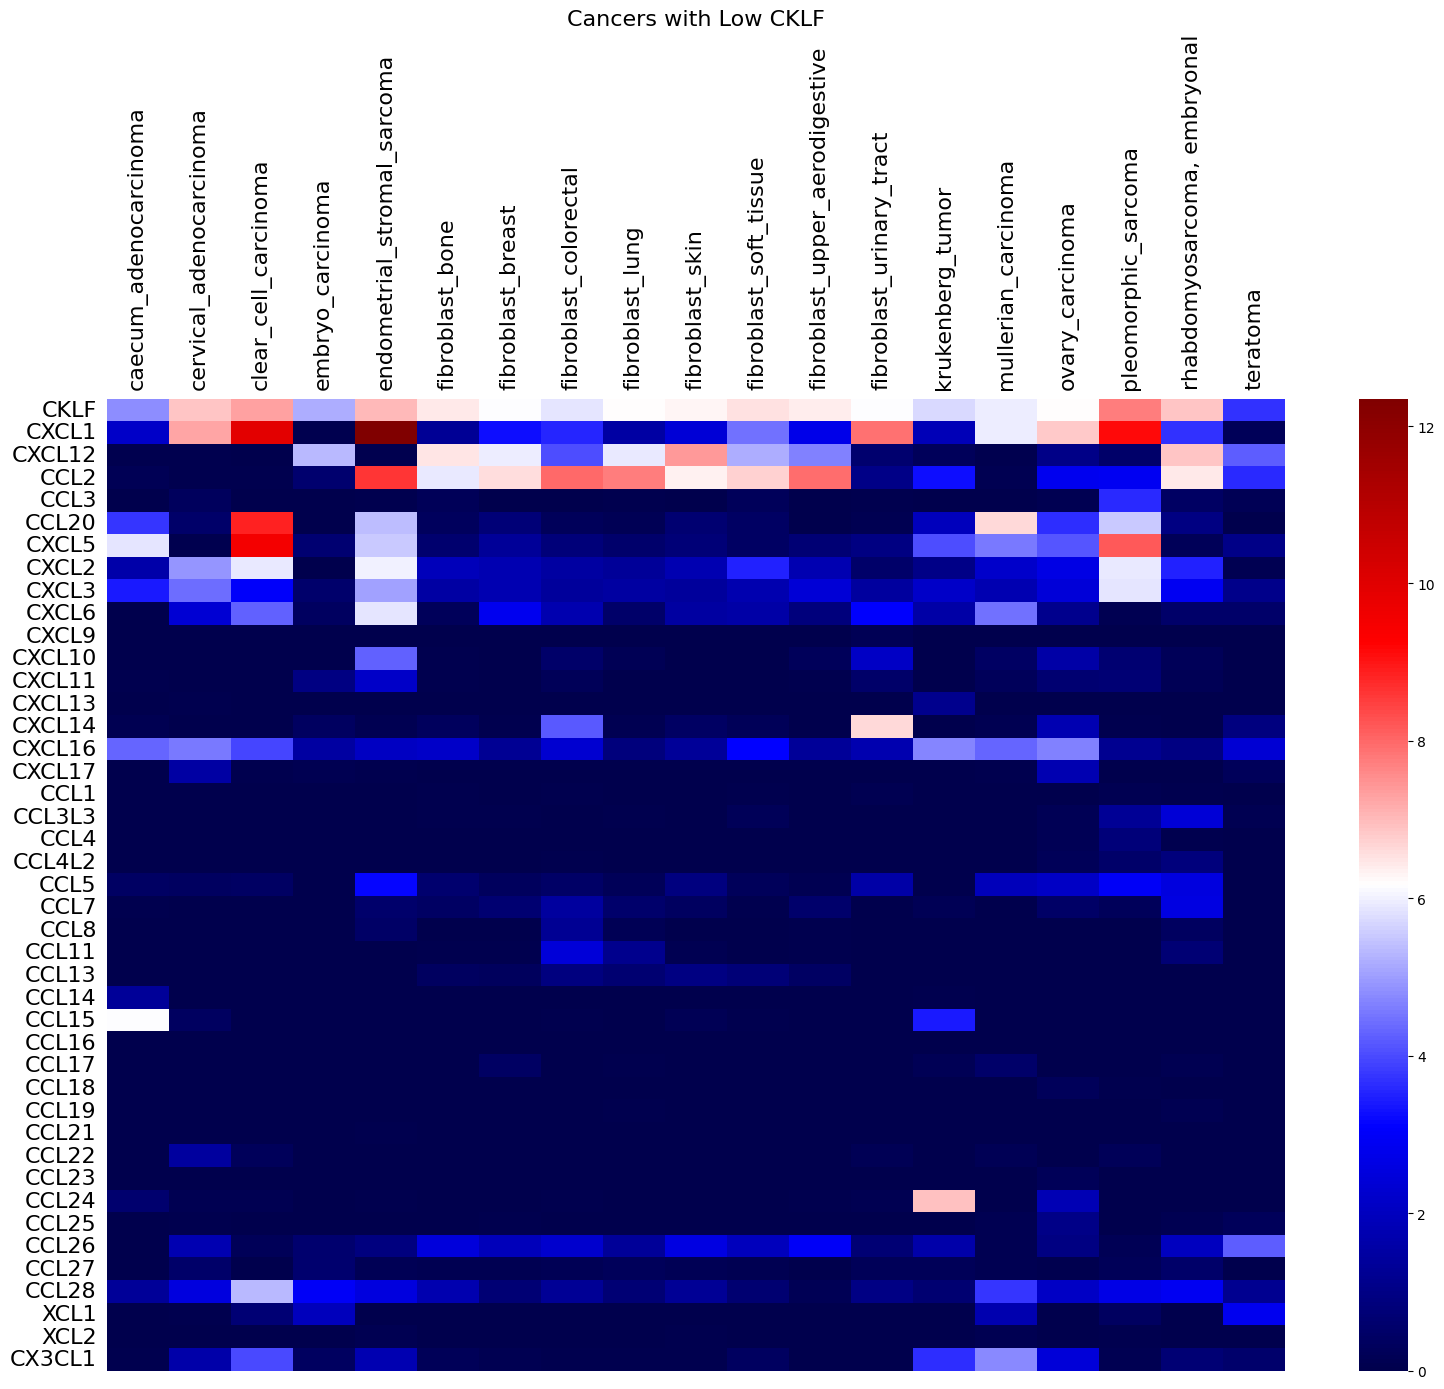

In [3]:
#create heatmap for low CKLF expression cancers only

low_cklf = df[df['Top Gene']!='CKLF']

last_column = low_cklf.pop('CXCL12')
low_cklf.insert(2, 'CXCL12', last_column)

last_column = low_cklf.pop('CCL2')
low_cklf.insert(3, 'CCL2', last_column)

last_column = low_cklf.pop('CCL3')
low_cklf.insert(4, 'CCL3', last_column)

last_column = low_cklf.pop('CXCL5')
low_cklf.insert(5, 'CXCL5', last_column)

last_column = low_cklf.pop('CCL20')
low_cklf.insert(5, 'CCL20', last_column)

new_df = low_cklf.iloc[:, :43]
new_df = new_df.drop(index=['CLL', 'fibroblast_lymphocyte', 'hodgkin_lymphoma', 'unspecified_leukemia']) #remove hematologic disorders
plot_heatmap(new_df, 'Cancers with Low CKLF', 'low_cklf_no_hem') #plot heatmap

# Heatmaps for High CKLF with no associated vs. associated genes

In [4]:
# find the gene with max expression excluding CKLF
exclude_cklf_df = df.iloc[: , 1:]
max_gene_exp = exclude_cklf_df.max(axis=1)
df['Max Gene'] = max_gene_exp
cklf_df = df[df['Top Gene'] == 'CKLF'] #cklf_df where top gene is CKLF
cklf_df = cklf_df.drop(columns='Top Gene') #remove chemokines with highest gene expression
cklf_df

,CKLF,CXCL1,CXCL2,CXCL3,CXCL5,CXCL6,CXCL9,CXCL10,CXCL11,CXCL12,...,CCL23,CCL24,CCL25,CCL26,CCL27,CCL28,XCL1,XCL2,CX3CL1,Max Gene
Cancer Type,,,,,,,,,,,,,,,,,,,,,
adrenal_carcinoma,7.456231,0.189034,0.042644,0.042644,0.028569,0.014355,0.000000,0.042644,0.137504,0.070389,...,0.000000,0.000000,0.097611,0.000000,0.933573,3.815575,0.000000,0.000000,0.084064,4.254745
ALL,7.171050,0.436738,0.234797,0.409454,0.168577,0.100195,0.003178,0.027858,0.021011,0.193940,...,0.007970,0.026538,0.748867,0.024475,0.115217,2.165823,0.388819,0.282389,0.036966,2.165823
AML,6.530549,0.985216,1.438383,1.052463,0.165016,0.178055,0.020278,0.500943,0.293863,0.063978,...,2.411297,0.236629,0.305281,0.030866,0.099133,1.421904,0.081973,0.173210,0.029871,4.256924
ATL,6.505732,0.000000,0.124328,0.042644,0.014355,0.000000,0.056584,0.238787,0.056584,0.124328,...,0.000000,0.000000,0.000000,0.000000,0.163499,0.028569,0.000000,0.000000,3.715893,6.302136
ATRT,7.359617,0.209926,0.027501,0.112865,0.161471,0.058721,0.000000,0.030579,0.005714,0.143727,...,0.027501,0.000000,0.042372,0.075591,0.191511,0.953610,0.000000,0.000000,0.343861,2.305834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
thyroid_squamous,6.592314,2.709581,2.321019,1.481272,1.886654,0.290615,0.009523,0.598035,0.335373,3.717050,...,0.000000,0.064023,0.042236,0.990186,0.346562,0.148492,1.510356,0.181989,1.194951,3.717050
undifferentiated_sarcoma,6.085977,2.214125,0.831877,0.214125,0.070389,1.718088,0.748461,0.722466,0.263034,4.177918,...,0.516015,0.000000,0.722466,1.292782,0.070389,0.056584,1.560715,1.761285,2.063503,5.384050
uterine_carcinosarcoma,6.758623,3.482848,2.238787,0.933573,5.326609,1.673556,0.000000,1.327687,0.189034,1.070389,...,0.000000,0.000000,0.000000,0.000000,0.163499,2.232661,1.545968,0.097611,4.095080,5.326609


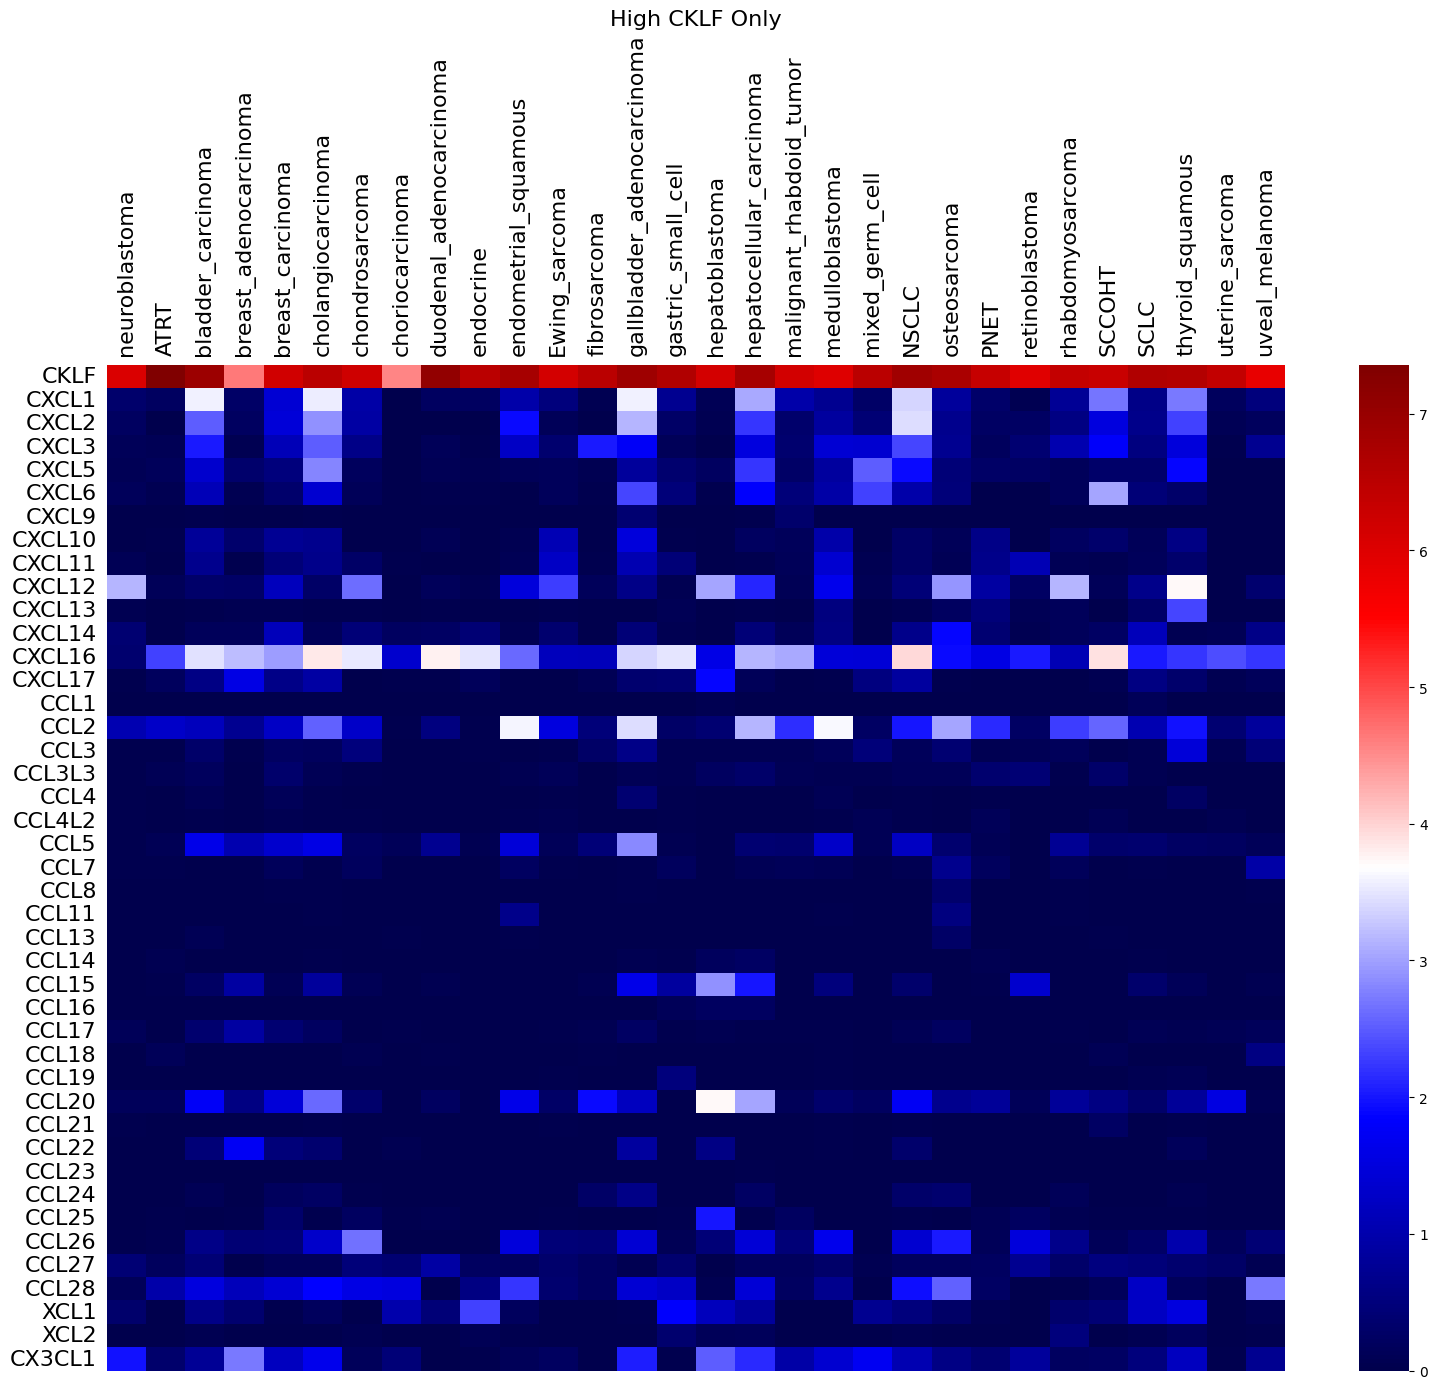

In [5]:
high_cklf_only_df = cklf_df[cklf_df['Max Gene'] < 4.0]
inverted_df = high_cklf_only_df.T.iloc[:43, :]
last_column = inverted_df.pop('neuroblastoma')
inverted_df.insert(0, 'neuroblastoma', last_column)
inverted_df = inverted_df.drop(columns=['ALL', 'CML', 'non_hodgkin_lymphoma']) #remove hematologic disorders
plot_heatmap(inverted_df.T, 'High CKLF Only', 'High CKLF Only_no_hem') #plot heatmap

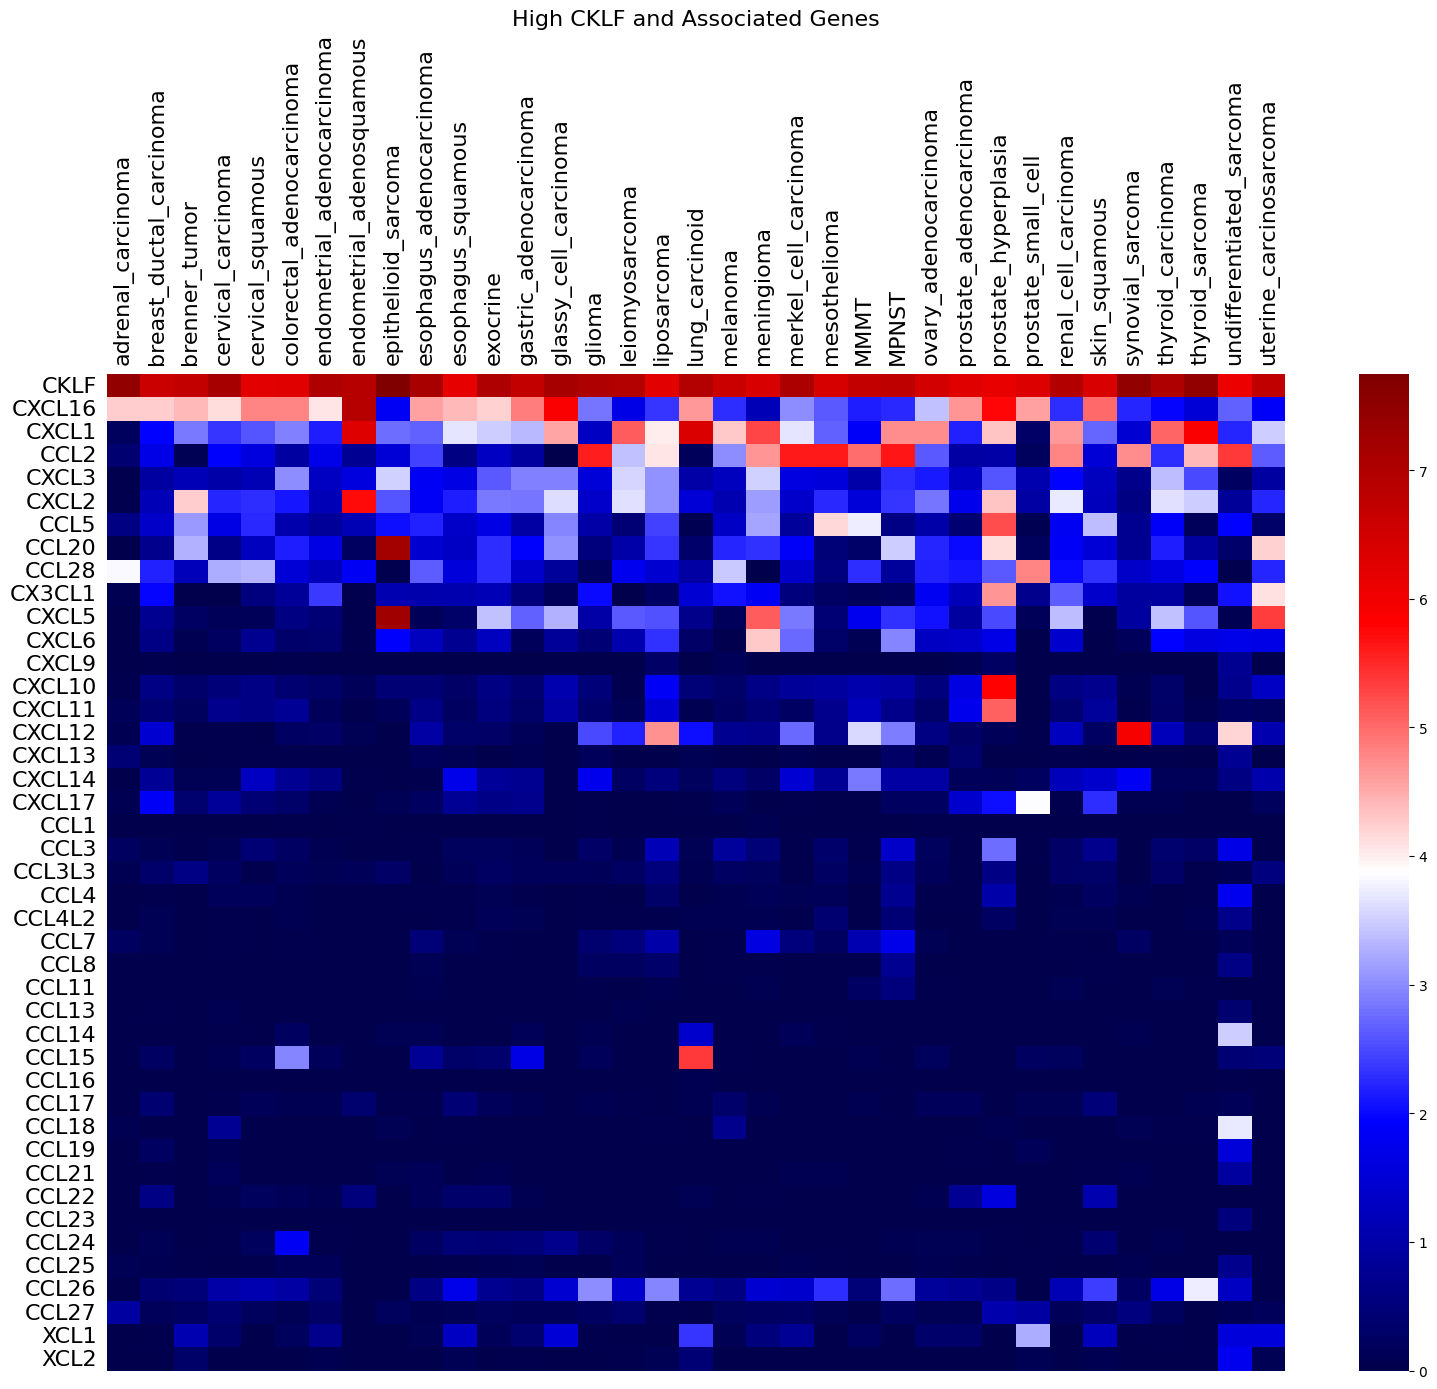

In [6]:
high_cklf_other_df = cklf_df[cklf_df['Max Gene'] >= 4.0]
high_cklf_other_df = high_cklf_other_df.iloc[:, :43]
gene_order = ['CXCL16', 'CXCL1', 'CCL2', 'CXCL2', 'CCL5', 'CCL20', 'CCL28', 'CX3CL1']

for i in range(len(gene_order)):
  gene = gene_order[i]
  column = high_cklf_other_df.pop(gene)
  high_cklf_other_df.insert(i+2, gene, column)

high_cklf_other_df = high_cklf_other_df.drop(index=['AML', 'ATL', 'lymphoma_unspecified', 'multiple_myeloma']) #remove hematologic disorders
plot_heatmap(high_cklf_other_df, 'High CKLF and Associated Genes', 'High CKLF and Associated Genes_no_hem') #plot heatmap

In [7]:
# find if each cancer has any cell line with mycn amp or not
# extract all file names for cell lines from folder
path = '/content/drive/MyDrive/Colab Notebooks/Feng lab/CCLE Database Gene Expression/Output/Cancer by Cell Lines_old/'
files = os.listdir(path)
excel_files = [f for f in files if f[-4:] == 'xlsx']
excel_files.sort(key=str.lower)

#for each file, print the cancer type if 'MYCN_amp' is in the 'MYCN Amp?' column
for file_name in excel_files:
  cancer_name = file_name[:file_name.index('.xlsx')]
  mycn_amp_df =pd.read_excel(path + file_name, header=0)
  mycn_amp_df = mycn_amp_df['MYCN Amp?']
  if 'MYCN_amp' in mycn_amp_df.unique():
    print(file_name[:-5] + ' is MYCN amplified')

neuroblastoma is MYCN amplified


# New Heatmaps Manually from Excel Sheets

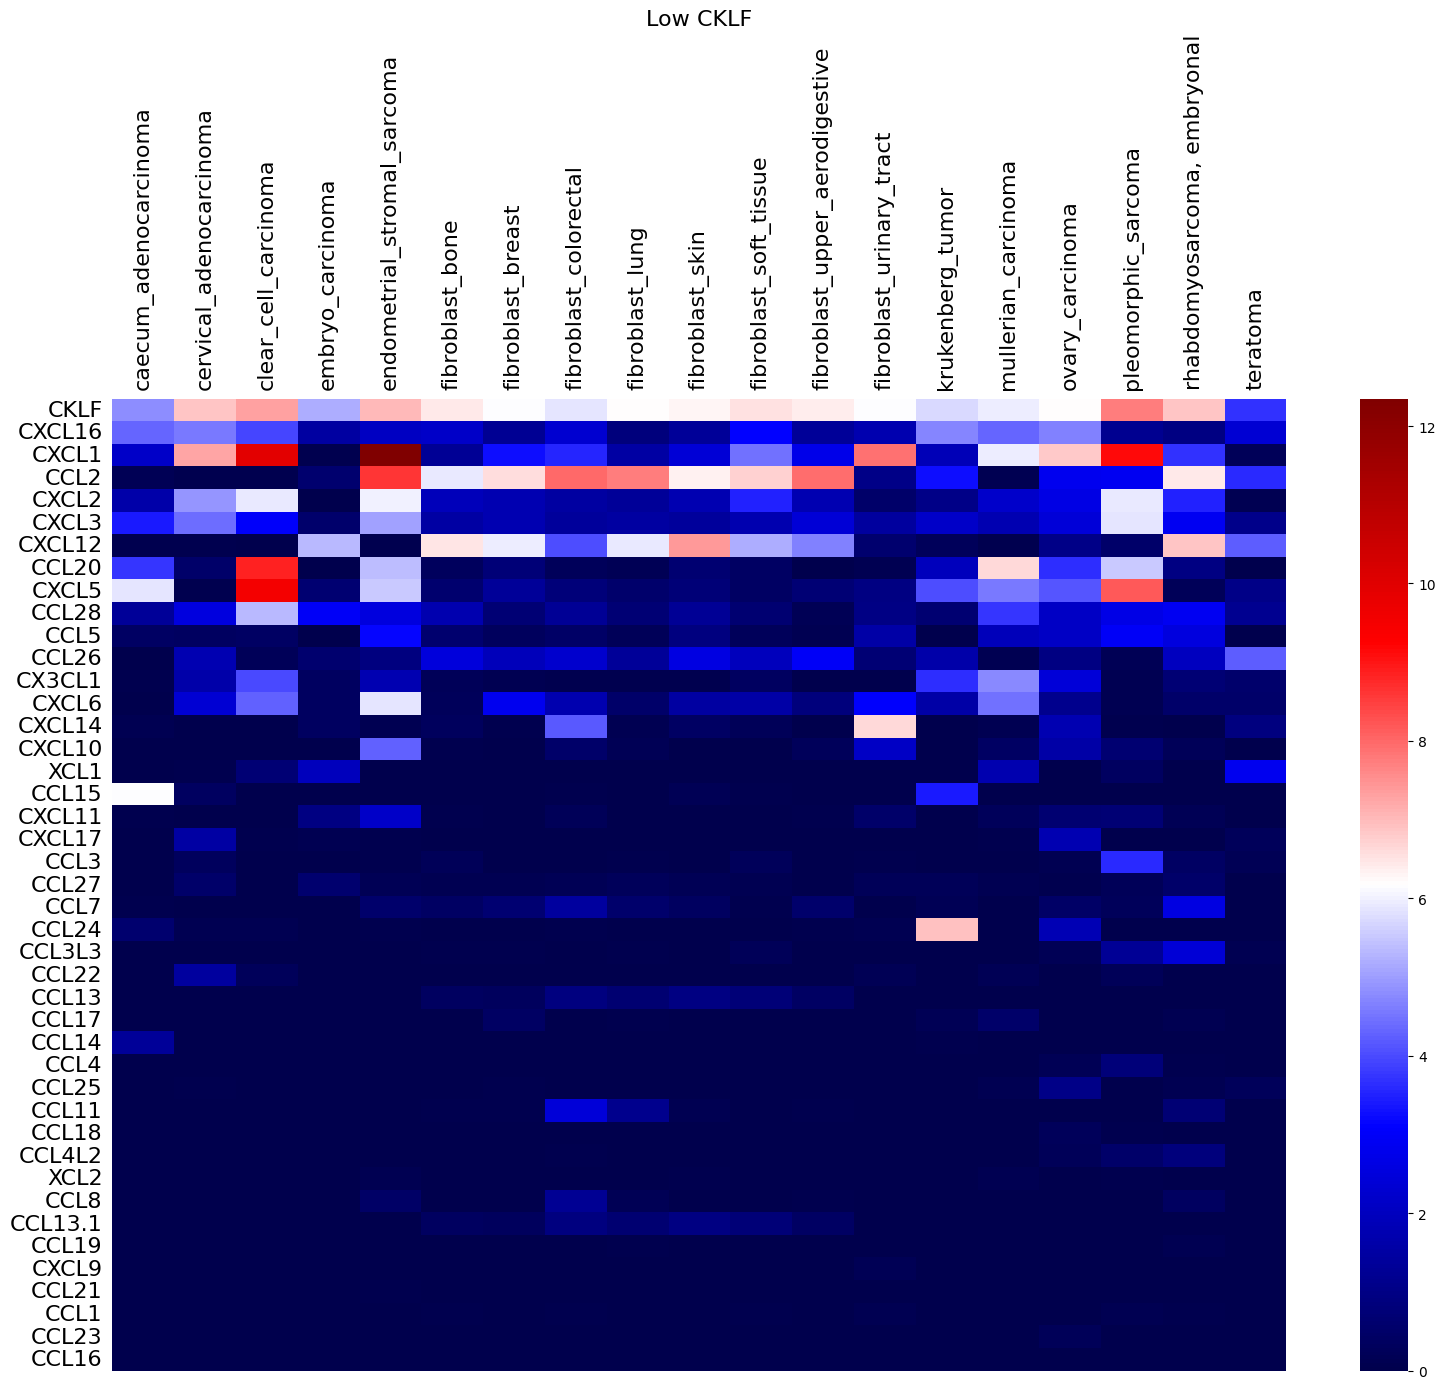

In [8]:
#plot heatmap for cancers with low CKLF gene expression
low_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Feng lab/CCLE Database Gene Expression/Input/Chart Low MR.xlsx', header=0)
low_df = low_df.set_index('Cancer Type ')
plot_heatmap(low_df, 'Low CKLF', 'Low CKLF')

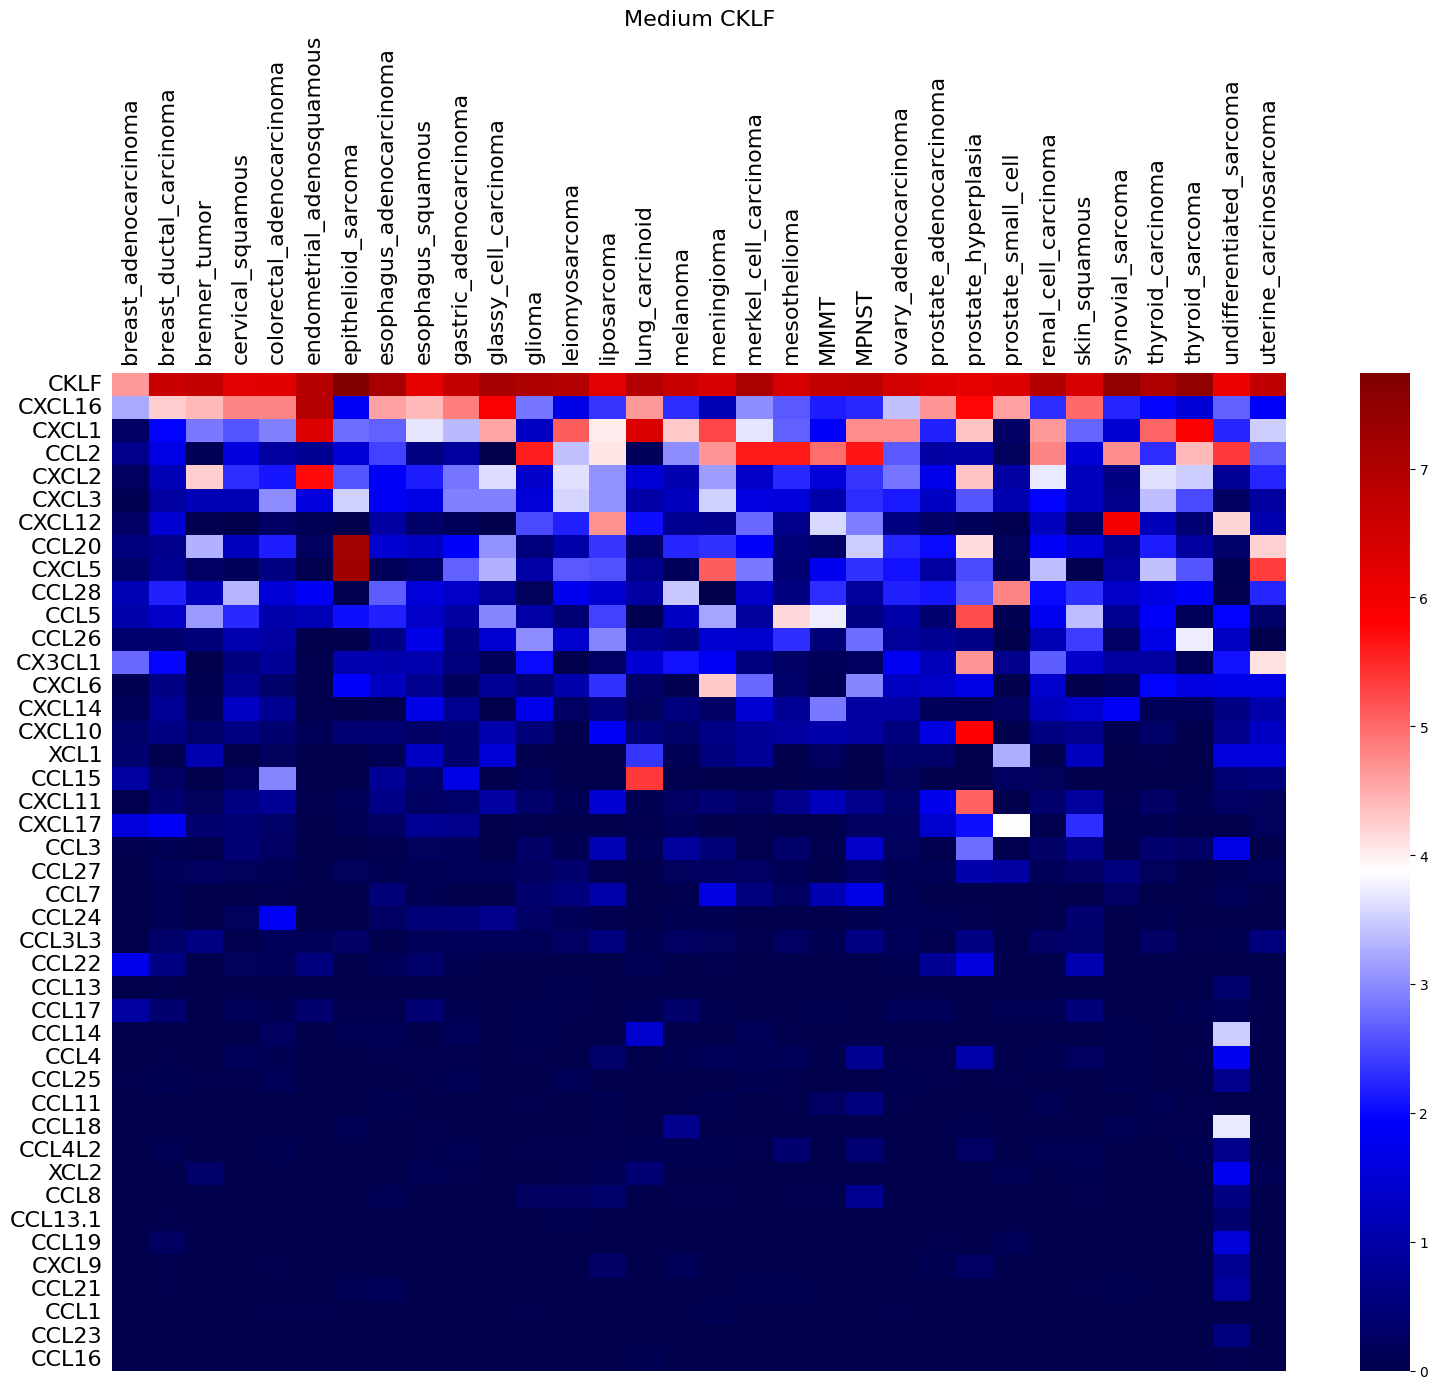

In [9]:
#plot heatmap for cancers with medium CKLF gene expression
med_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Feng lab/CCLE Database Gene Expression/Input/Chart Middle MR .xlsx', header=0)
med_df = med_df.set_index('Cancer Type ')
plot_heatmap(med_df, 'Medium CKLF', 'Medium CKLF')

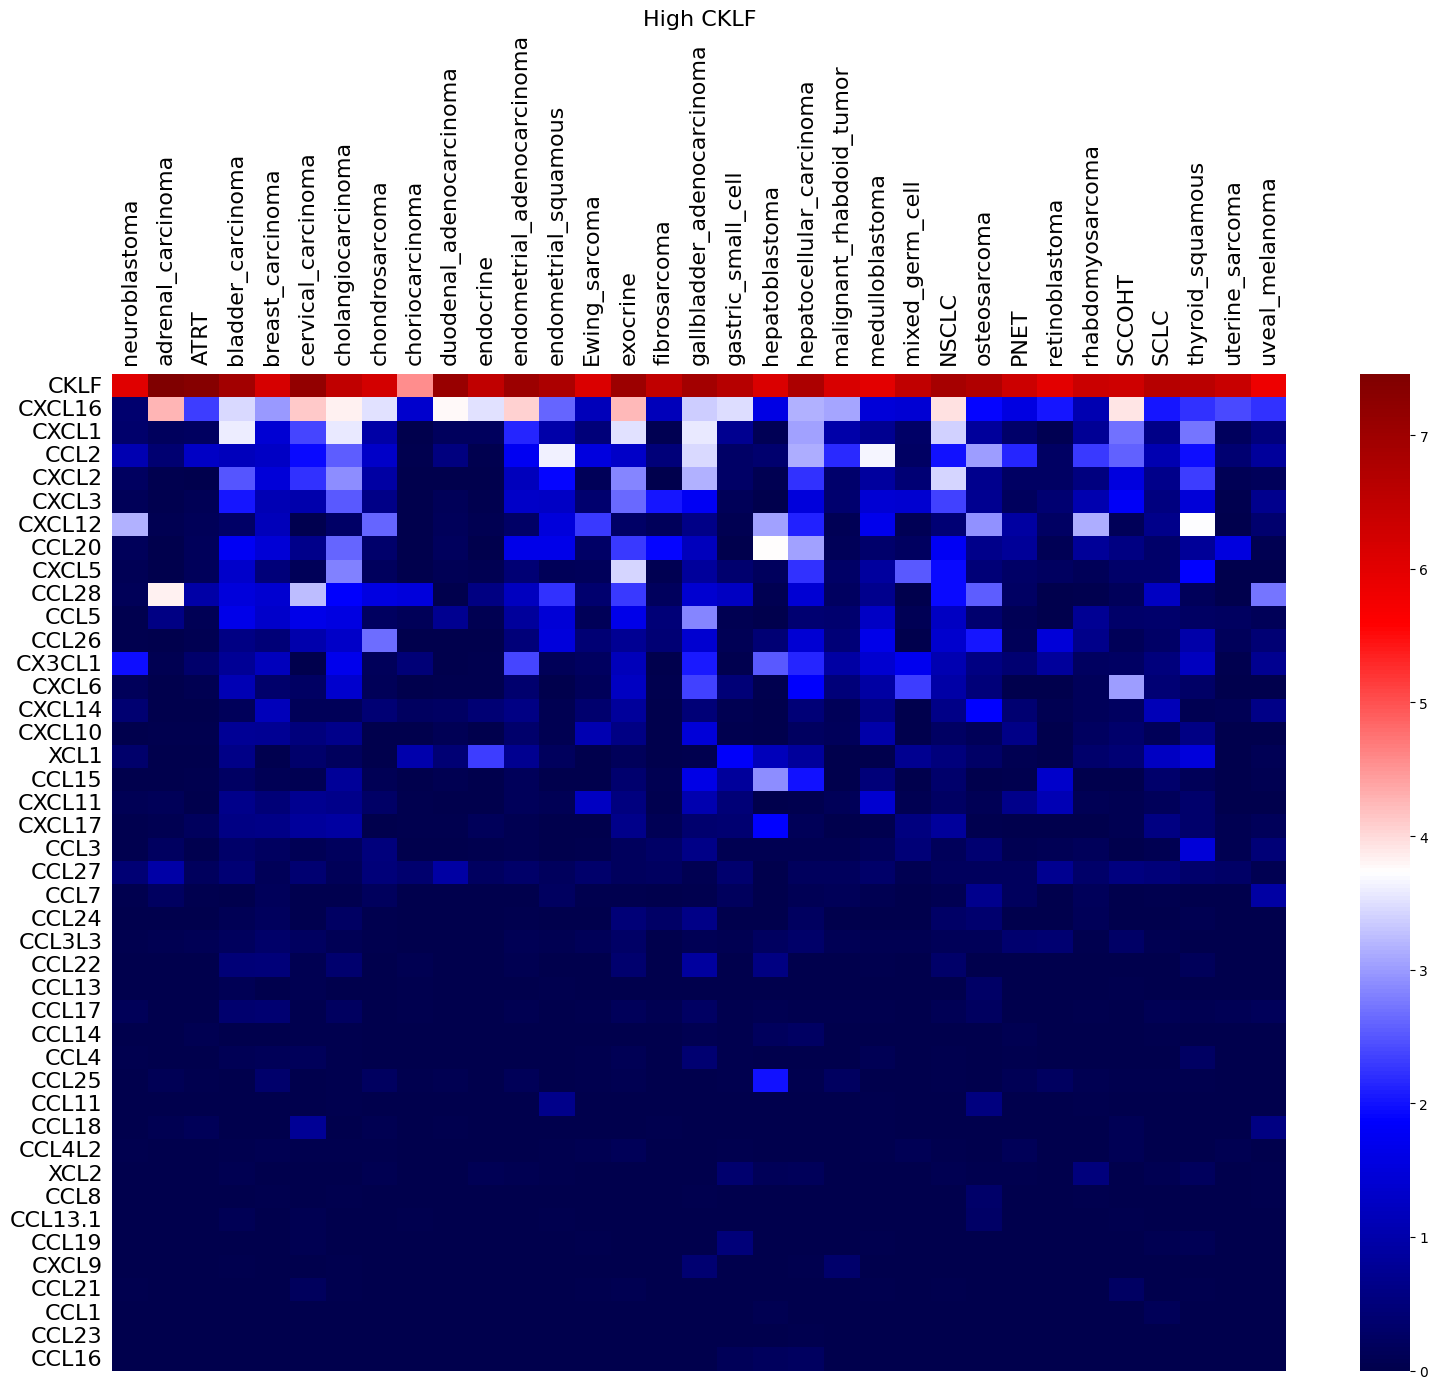

In [10]:
#plot heatmap for cancers with high CKLF gene expression
high_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Feng lab/CCLE Database Gene Expression/Input/Chart High MR.xlsx', header=0)
high_df = high_df.set_index('Cancer Type ')
plot_heatmap(high_df, 'High CKLF', 'High CKLF')

In [11]:
# obtain all cancers with all desired chemokine markers and format dataset appropriately for heatmap
excel = '/content/drive/MyDrive/Colab Notebooks/Feng lab/CCLE Database Gene Expression/Input/GroupOrders.xlsx'
list_df = pd.read_excel(excel, header=1)
cancer_group_order = list_df['Tumor'].tolist()
chemokine_order = list_df['Unnamed: 6'].dropna().tolist()
cancer_group_order2 = [x.lower().replace(' ', '_') if x.isupper()==False else x for x in cancer_group_order ]
rhab_i = cancer_group_order2.index('rhabdomyosarcoma,_embryonal')
cancer_group_order2[rhab_i] = 'rhabdomyosarcoma, embryonal'
ewing_i = cancer_group_order2.index('ewing_sarcoma')
cancer_group_order2[ewing_i] = 'Ewing_sarcoma'
df_mod = df.copy(deep=True)
df_mod = df_mod.reindex(index = cancer_group_order2)
df_mod = df_mod.reindex(columns = chemokine_order)
df_mod

,CKLF,CXCL16,CXCL1,CCL2,CXCL2,CXCL3,CXCL12,CCL20,CXCL5,CCL28,...,CCL4L2,XCL2,CCL8,CCL13,CCL19,CXCL9,CCL21,CCL1,CCL23,CCL16
Cancer Type,,,,,,,,,,,,,,,,,,,,,
uterine_sarcoma,6.399342,2.405992,0.189034,0.389567,0.111031,0.042644,0.028569,1.526069,0.028569,0.014355,...,0.084064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ATRT,7.359617,2.305834,0.209926,1.274427,0.027501,0.112865,0.143727,0.169599,0.161471,0.953610,...,0.028051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024866,0.027501,0.000000
duodenal_adenocarcinoma,7.100242,3.779260,0.201634,0.526069,0.000000,0.124328,0.163499,0.201634,0.111031,0.014355,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
choriocarcinoma,4.562195,1.341329,0.000000,0.055872,0.018861,0.000000,0.018861,0.000000,0.000000,1.495125,...,0.000000,0.000000,0.000000,0.045835,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
endocrine,6.508270,3.502076,0.201634,0.042644,0.000000,0.056584,0.070389,0.000000,0.070389,0.555816,...,0.000000,0.111031,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
undifferentiated_sarcoma,6.085977,2.664483,2.214125,5.384050,0.831877,0.214125,4.177918,0.344828,0.070389,0.056584,...,0.687061,1.761285,0.622930,0.378512,1.526069,0.748461,0.895303,0.000000,0.516015,0.042644
ovary_carcinoma,6.181790,4.649659,6.809436,2.833364,2.626359,2.446936,1.043494,3.625730,4.113965,2.100111,...,0.234005,0.000000,0.035195,0.000000,0.000000,0.000000,0.000000,0.000000,0.232334,0.000000
clear_cell_carcinoma,7.292045,3.908813,9.912306,0.056584,5.915521,3.035624,0.014355,8.861521,9.537568,5.314334,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


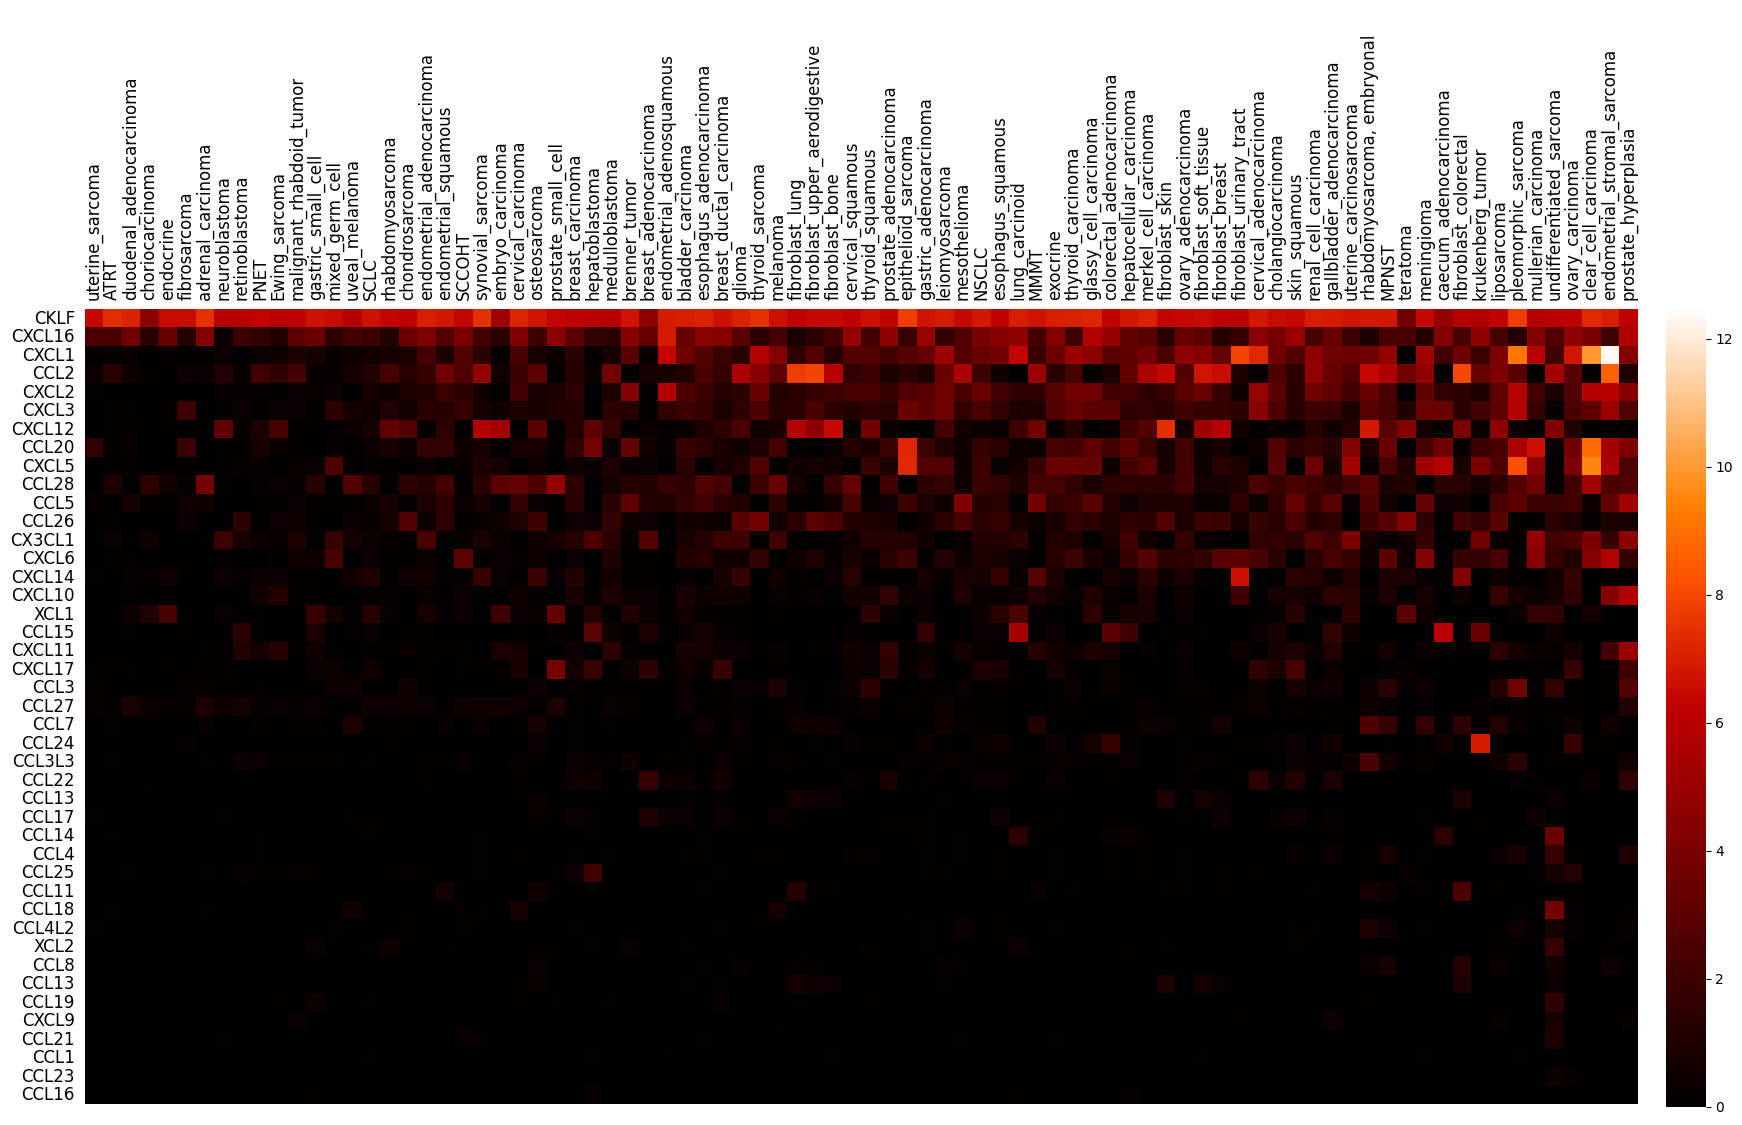

In [12]:
#plot heatmap for all cancers with desired chemokine markers
plot_final_heatmap(df_mod, 'CKLF_final_2', 'gist_heat')